In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [128]:
# Read datasets/confirmed_cases_worldwide.csv into confirmed_cases_worldwide
confirmed_cases_worldwide = pd.read_csv("confirmed_cases_worldwide.csv")



In [129]:
# Display the first few rows of the DataFrame
print(confirmed_cases_worldwide.head())


         date  cum_cases
0  2020-01-22        555
1  2020-01-23        653
2  2020-01-24        941
3  2020-01-25       1434
4  2020-01-26       2118


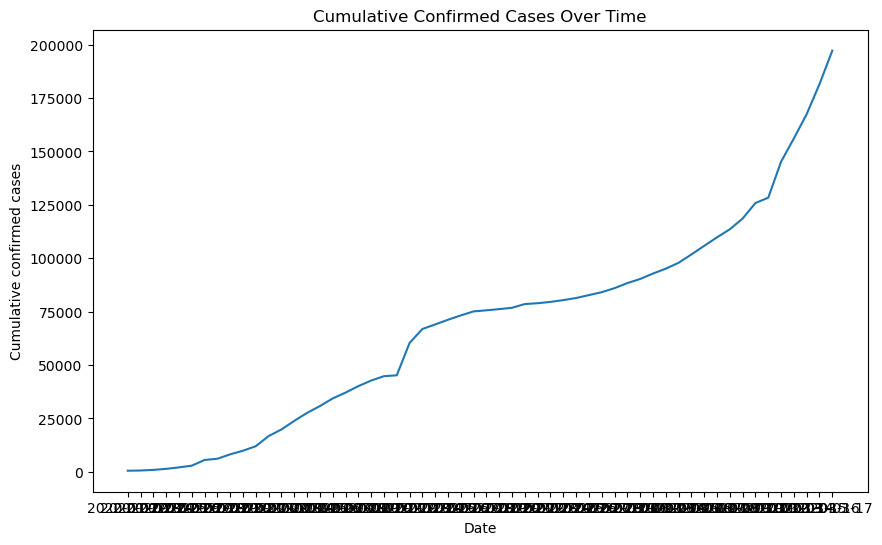

In [130]:

# Draw a line plot of cumulative cases vs. date
plt.figure(figsize=(10, 6))
sns.lineplot(x="date", y="cum_cases", data=confirmed_cases_worldwide)
plt.title("Cumulative Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative confirmed cases")
plt.show()


In [131]:

# Read in datasets/confirmed_cases_china_vs_world.csv
confirmed_cases_china_vs_world = pd.read_csv("confirmed_cases_china_vs_world.csv")


In [132]:

# Display the first few rows of the DataFrame
print(confirmed_cases_china_vs_world.head())


  is_china        date  cases  cum_cases
0    China  2020-01-22    548        548
1    China  2020-01-23     95        643
2    China  2020-01-24    277        920
3    China  2020-01-25    486       1406
4    China  2020-01-26    669       2075


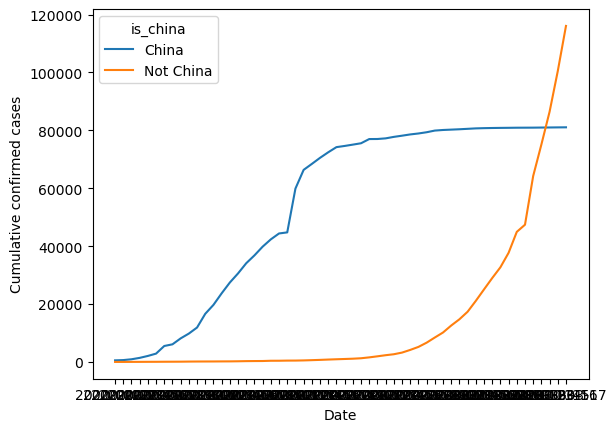

In [133]:

# Draw a line plot of cumulative cases vs. date, colored by is_china
plt_cum_confirmed_cases_china_vs_world = sns.lineplot(x="date", y="cum_cases", hue="is_china", data=confirmed_cases_china_vs_world)
plt_cum_confirmed_cases_china_vs_world.set(xlabel="Date", ylabel="Cumulative confirmed cases")
plt.show()



In [134]:

# Using who_events, add vertical dashed lines with an x-intercept at date
# and text at date, labeled by event, and at 100000 on the y-axis
who_events = pd.DataFrame({
    'date': ["2020-01-30", "2020-03-11", "2020-02-13"],
    'event': ["Global health\nemergency declared", "Pandemic\ndeclared", "China reporting\nchange"]
})

who_events['date'] = pd.to_datetime(who_events['date'])

plt_cum_confirmed_cases_china_vs_world = plt_cum_confirmed_cases_china_vs_world

for date, event in zip(who_events['date'], who_events['event']):
    plt_cum_confirmed_cases_china_vs_world.axvline(x=str(date), linestyle="--", color='black')
    plt_cum_confirmed_cases_china_vs_world.text(date, 100000, event, rotation=45, verticalalignment='top')

plt.show()

In [135]:
# Filter for China, from Feb 15
china_after_feb15 = confirmed_cases_china_vs_world.loc[
    (confirmed_cases_china_vs_world['is_china'] == "China") &
    (confirmed_cases_china_vs_world['date'] >= "2020-02-15")
]


C:\Users\hp\AppData\Local\Temp\ipykernel_7108\497364128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_after_feb15['date_numeric'] = date2num(china_after_feb15['date'])


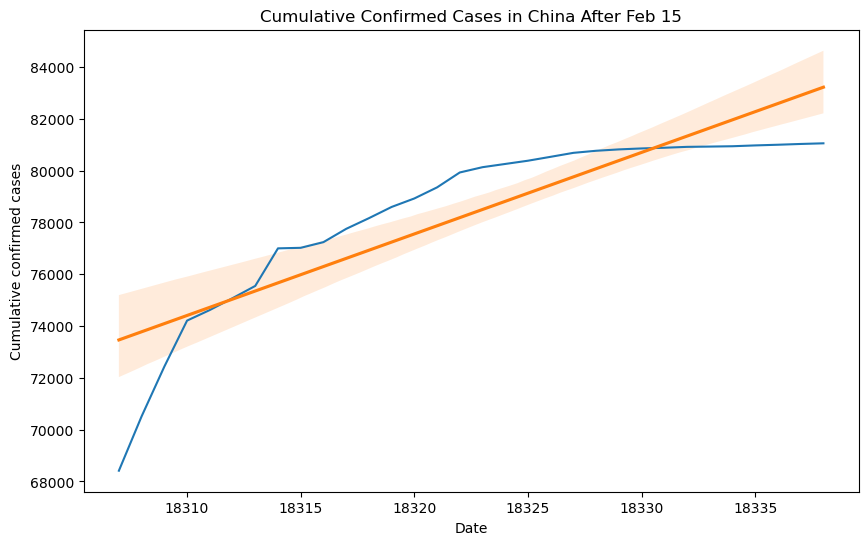

In [136]:

# Using china_after_feb15, draw a line plot cum_cases vs. date
# Add a smooth trend line using linear regression, no error bars
from matplotlib.dates import date2num
import matplotlib.dates as mdates
china_after_feb15['date_numeric'] = date2num(china_after_feb15['date'])

plt.figure(figsize=(10, 6))
sns.lineplot(x='date_numeric', y='cum_cases', data=china_after_feb15)
sns.regplot(x='date_numeric', y='cum_cases', data=china_after_feb15, scatter=False)
plt.title("Cumulative Confirmed Cases in China After Feb 15")
plt.xlabel("Date")
plt.ylabel("Cumulative confirmed cases")
plt.show()

In [137]:
# Filter confirmed_cases_china_vs_world for not China
not_china = confirmed_cases_china_vs_world[confirmed_cases_china_vs_world['is_china'] == "Not China"]

print(not_china[not_china['date'].isna()])


Empty DataFrame
Columns: [is_china, date, cases, cum_cases]
Index: []


C:\Users\hp\AppData\Local\Temp\ipykernel_7108\2073934142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_china['date'] = pd.to_datetime(not_china['date'])
C:\Users\hp\AppData\Local\Temp\ipykernel_7108\2073934142.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_china['date_numeric'] = not_china['date'].dt.strftime('%Y%m%d').astype(int)


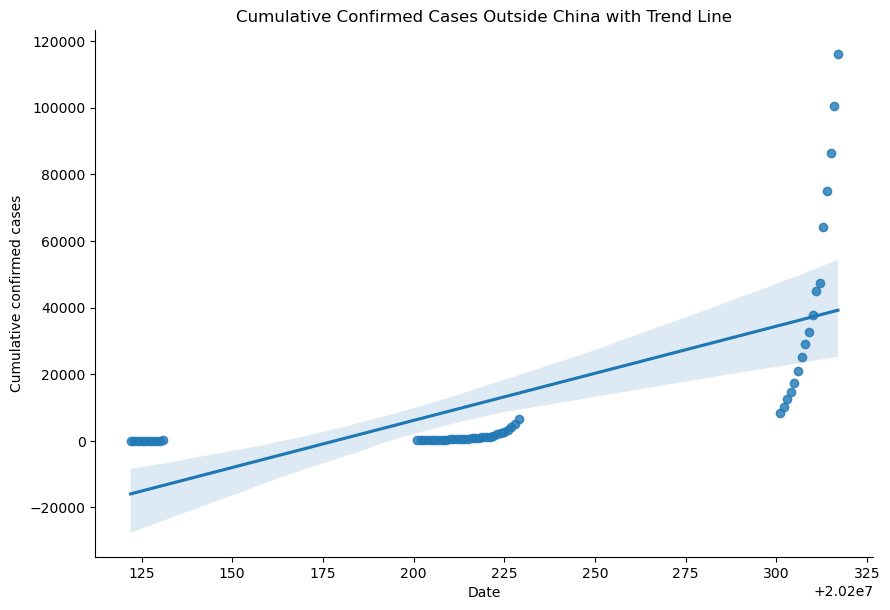

In [138]:
# Convert 'date' column to datetime format
not_china['date'] = pd.to_datetime(not_china['date'])

# Extract the numerical representation of the date
not_china['date_numeric'] = not_china['date'].dt.strftime('%Y%m%d').astype(int)

# Using not_china, draw a line plot cum_cases vs. date_numeric
# Add a smooth trend line using linear regression, no error bars
plt_not_china_trend_lin = sns.lmplot(x="date_numeric", y="cum_cases", data=not_china, height=6, aspect=1.5)
plt_not_china_trend_lin.set_axis_labels("Date", "Cumulative confirmed cases")
plt.title("Cumulative Confirmed Cases Outside China with Trend Line")

plt.show()


In [139]:

# Modify the plot to use a logarithmic scale on the y-axis
plt_not_china_trend_lin.set(yscale="log")

plt.show()


In [140]:
# Run this to get the data for each country
confirmed_cases_by_country = pd.read_csv("confirmed_cases_by_country.csv")
print(confirmed_cases_by_country.head())


               country province        date  cases  cum_cases
0          Afghanistan      NaN  2020-01-22      0          0
1              Albania      NaN  2020-01-22      0          0
2              Algeria      NaN  2020-01-22      0          0
3              Andorra      NaN  2020-01-22      0          0
4  Antigua and Barbuda      NaN  2020-01-22      0          0


In [141]:

# Group by country, summarize to calculate total cases, find the top 7
top_countries_by_total_cases = confirmed_cases_by_country.groupby("country")["cum_cases"].max().nlargest(7).reset_index()


In [142]:

# Display the result
print(top_countries_by_total_cases.head())


        country  cum_cases
0         Italy      31506
1          Iran      16169
2         Spain      11748
3       Germany       9257
4  Korea, South       8320


In [143]:

# Read in the dataset from datasets/confirmed_cases_top7_outside_china.csv
confirmed_cases_top7_outside_china = pd.read_csv("confirmed_cases_top7_outside_china.csv")



In [144]:
# Display the first few rows of the DataFrame
print(confirmed_cases_top7_outside_china.head())



        country        date  cum_cases
0       Germany  2020-02-18         16
1          Iran  2020-02-18          0
2         Italy  2020-02-18          3
3  Korea, South  2020-02-18         31
4         Spain  2020-02-18          2


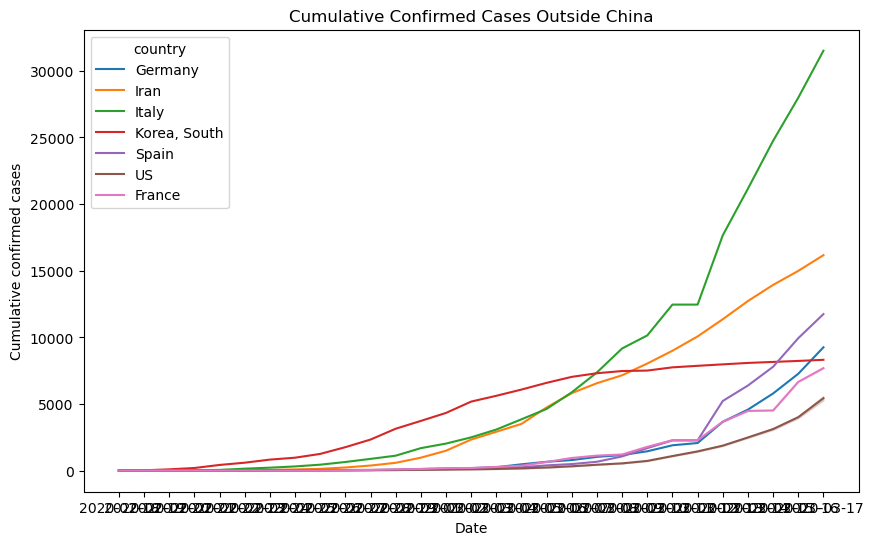

In [145]:
# Using confirmed_cases_top7_outside_china, draw a line plot of
# cum_cases vs. date, colored by country
plt.figure(figsize=(10, 6))
sns.lineplot(x="date", y="cum_cases", hue="country", data=confirmed_cases_top7_outside_china)
plt.title("Cumulative Confirmed Cases Outside China")
plt.xlabel("Date")
plt.ylabel("Cumulative confirmed cases")
plt.show()